Assessment Details
You are working at the bank as a data analyst, your task is to perform a comprehensive statistical analysis
of the "Bank Marketing" dataset. Your analysis should cover various statistics topics, including Descriptive
Statistics, Probability and Distributions.
1. Calculate descriptive statistics and present a summary for relevant variables in the dataset.
Describe the central tendencies and variability in the data. You must justify the choice of the
variables in this point. [0 – 25%]
2. Create two visualisations (e.g., histograms, box plots) to represent the distribution of the numeric
variables that you consider relevant. What patterns can you observe? [0 – 10%]
3. Calculate and interpret probabilities that might affect the success of a marketing campaign. Why
these variables are relevant? [0 -15%]
4. Analyse a subset of the dataset related and calculate a specified probability of success. With this
probability, place a Binomial distribution and explain why this result is important in a banking
marketing campaign. [0 - 20%]
5. Use Normal distribution to explain a main variable. Visualise the data of your variable and
determine whether this could be considered normally distributed or not. [0 – 15%]
6. Present all your results in a form of a report (minimum 1700 words). The report should contain an
executive introduction, body, and conclusion with suggestions for the marketing campaign. [0-15%]

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

Exploratory Data Analysis (EDA)
###### This is the initial phase where I explore my dataset, visualize data, calculate statistics, and uncover patterns, anomalies, and potential issues. It's focused on understanding the data, not on preparing it for analysis. EDA helps me decide how to proceed with data preprocessing

1. Data summary

In [2]:
file_path = "Bank_Mkt_campaign.csv"
data_df = pd.read_csv(file_path)
data_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


2. Visualize data

In [5]:
# from ydata_profiling import ProfileReport
# slice_data_df = data_df.iloc[:, :10]
# report = ProfileReport(data_df, title='My Data', minimal=True)
# report.to_file("my_report.html")

Thanks to My_report I can see there are 2 Variable types: 7 as Numerical, 9 as Categorical, and 1 Yes/No

Numerical columns:

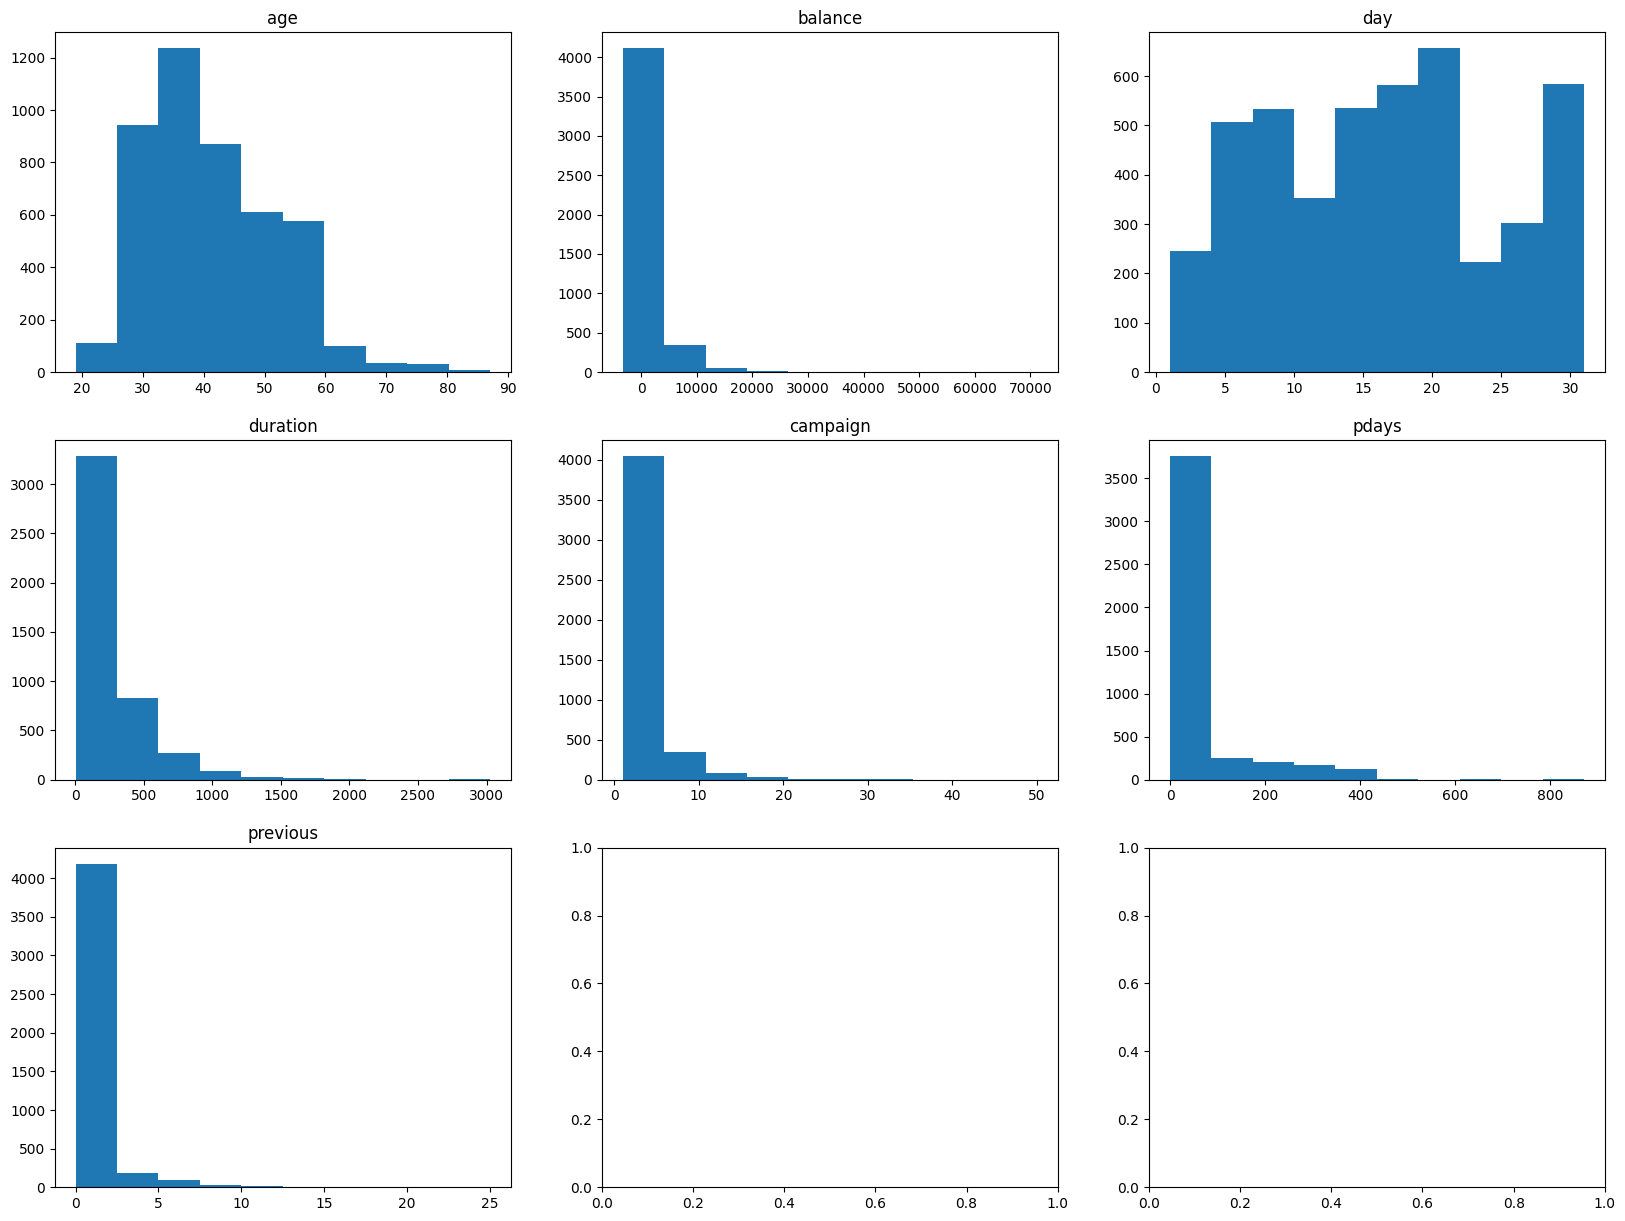

In [54]:
num_columns = ['age','balance', 'day','duration', 'campaign', 'pdays', 'previous']

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for num_column in num_columns:
    value_counts = data_df[cat_column].value_counts()

    trace_x = counter // 3
    trace_y = counter % 3
    
    axs[trace_x, trace_y].hist(data_df[num_column])
    
    axs[trace_x, trace_y].set_title(num_column)
    
    counter += 1

plt.show()

You already have basic descriptive statistics such as the mean, minimum, maximum, and more for each numerical variable. You can use these statistics to understand the central tendencies and the range of values for each variable

Identify any potential outliers in the data that might require further investigation

Inspect the "balance" variable, which has a significant number of zeros and negative values. You may need to determine whether these values are valid or need to be treated differently.
Consider handling any outliers or extreme values in the data, especially in the "balance," "duration," "campaign," and "pdays" variables

Analyze how different numerical variables may affect the success of a marketing campaign. For example, you can calculate the probability of success for different age groups or balance levels.
Assess whether there are correlations or dependencies between the numerical features and campaign success

If you have specific events in your dataset (e.g., success/failure of a marketing campaign), you can model the distribution of these events using a binomial distribution.
Calculate and interpret probabilities related to the success of your campaign using the binomial distribution. For instance, you might be interested in the probability of achieving a specific number of successes in a given number of trials

Assess whether the numerical variables follow a normal distribution. You can visually inspect the distributions and use statistical tests (e.g., normality tests) to make this determination.
If a variable follows a normal distribution, you can make inferences and predictions based on standard normal distribution properties

Consider creating new features or transformations of existing features that might improve the performance of your marketing campaign prediction model. For example, you can create age groups or account balance categories

Examine the correlations between numerical features to understand the relationships between them. This can help in feature selection and identifying important factors in your marketing campaign

Categorical columns:

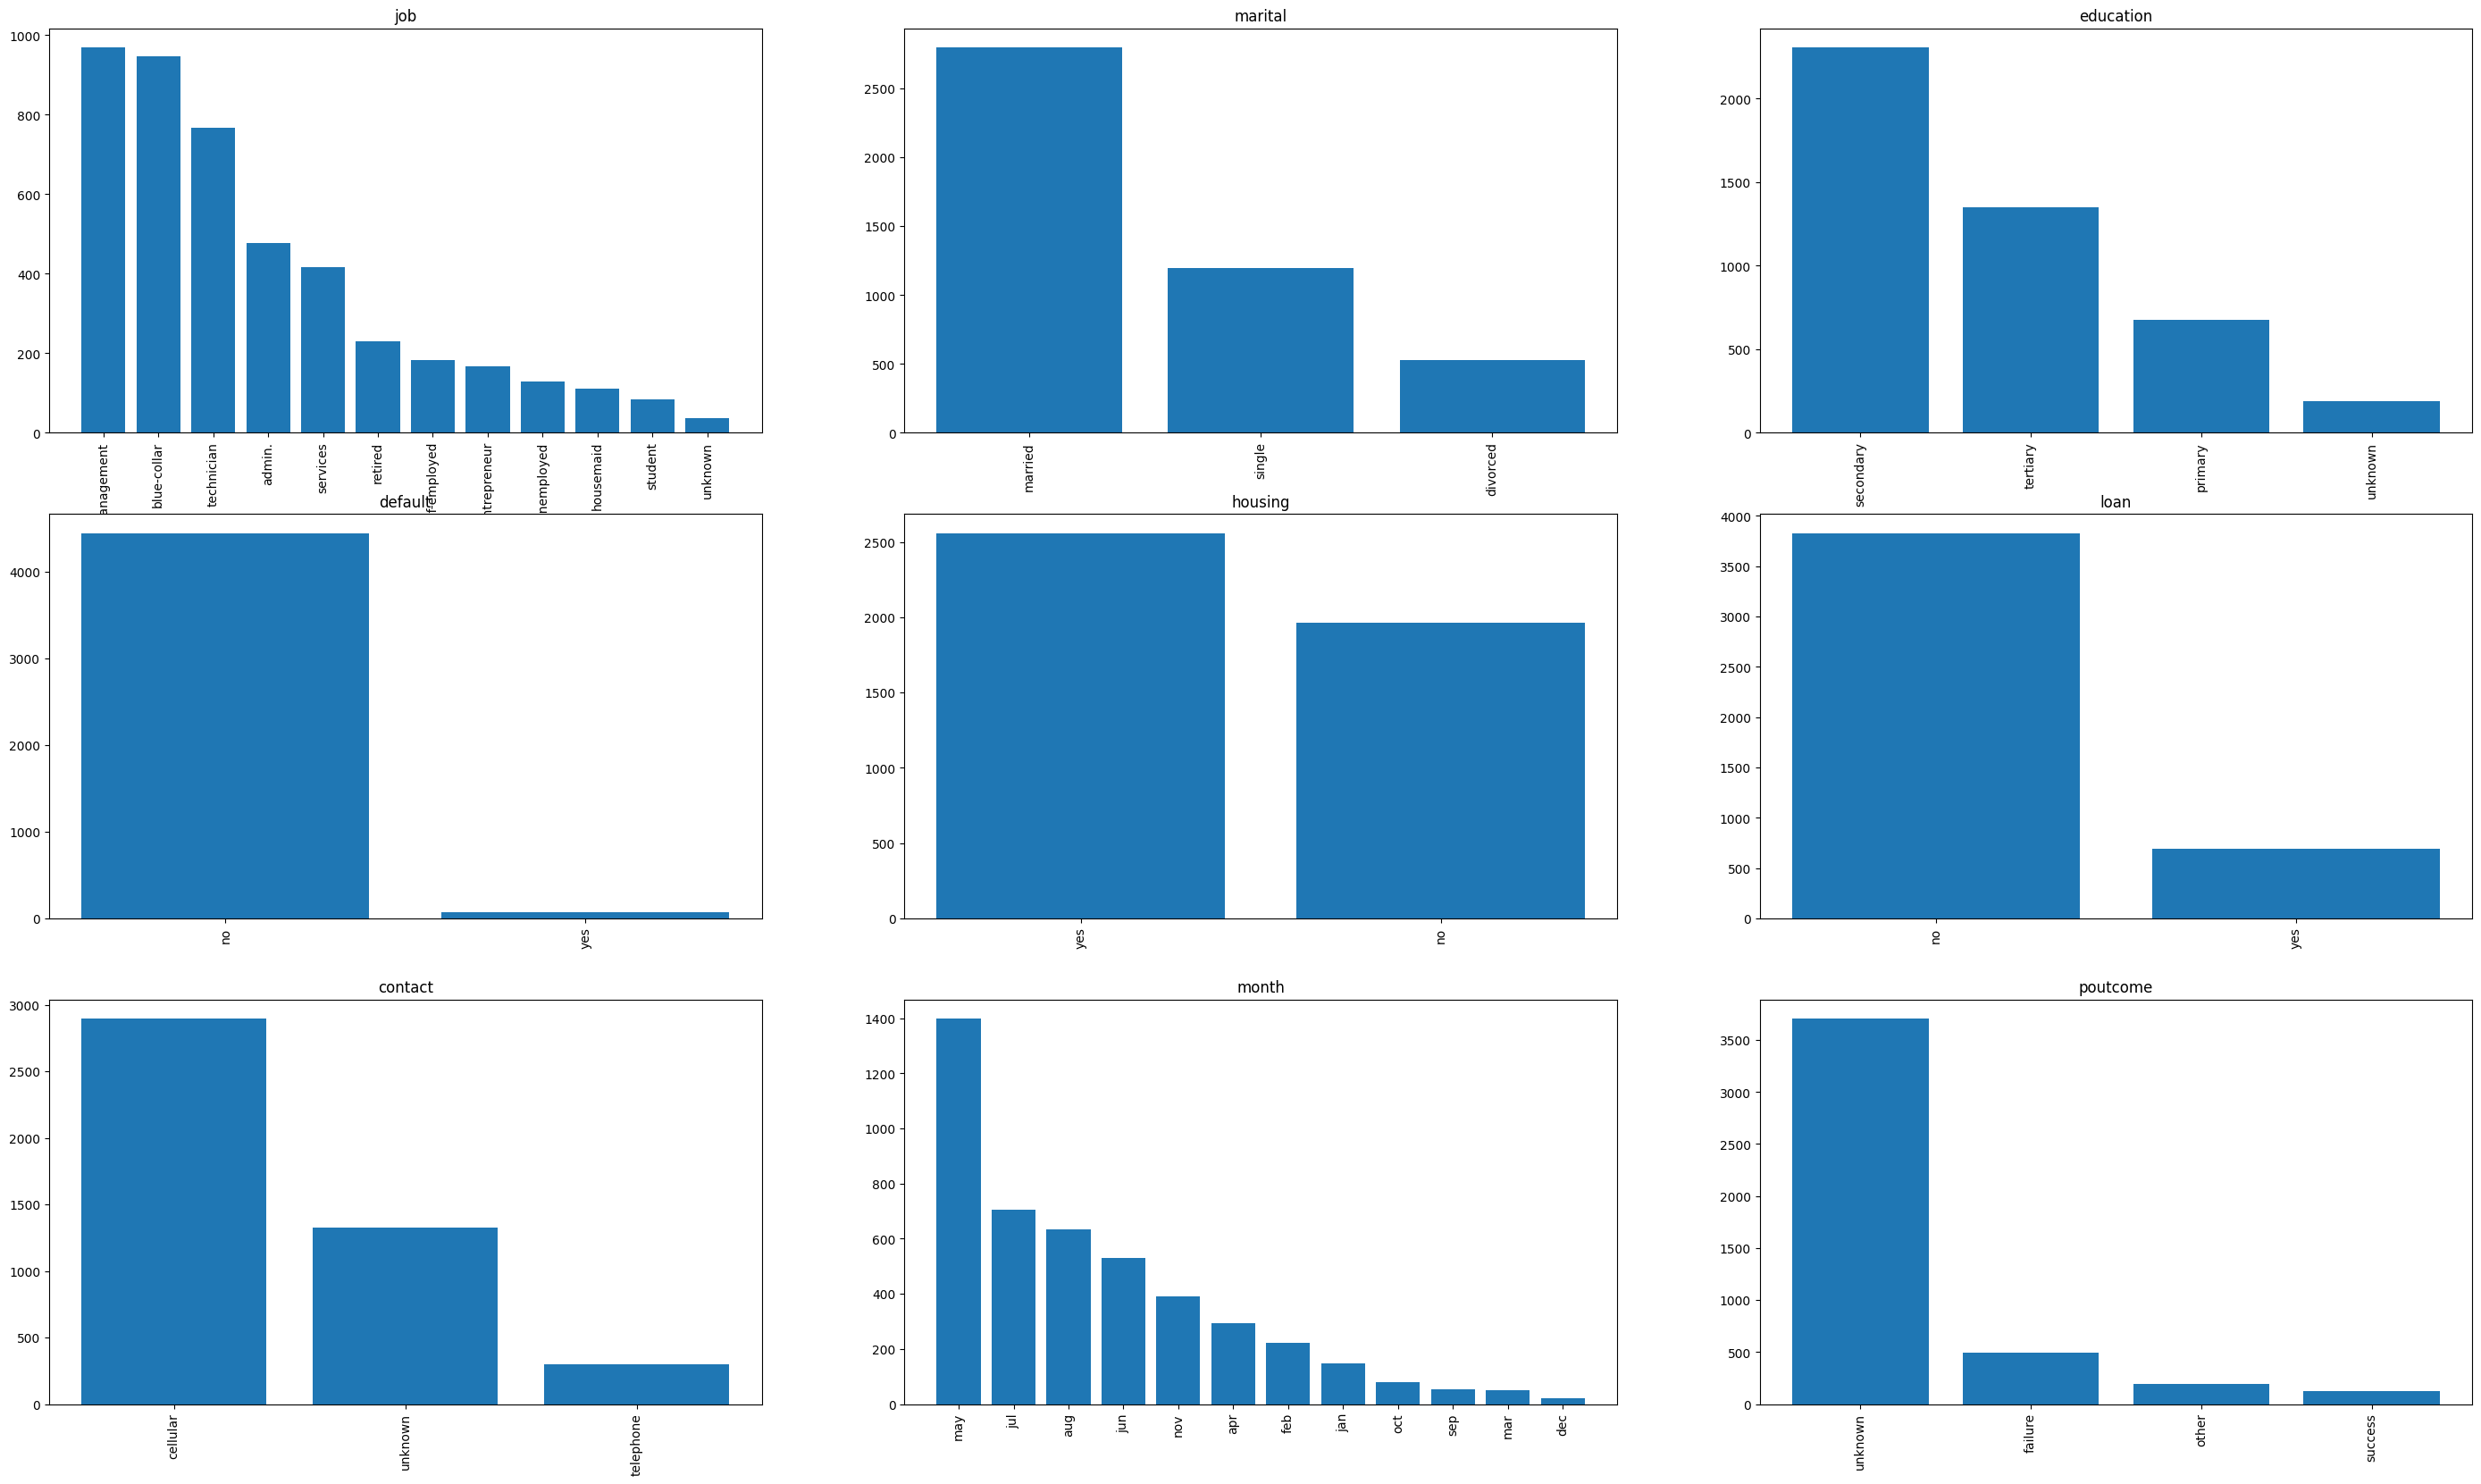

In [60]:
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(35, 20))

counter = 0
for cat_column in cat_columns:
    value_counts = data_df[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()

Data Preprocessing

###### After completing EDA and gaining insights about the dataset, I move on to the data preprocessing phase. In this phase, I address the issues identified during EDA, such as handling missing values, cleaning the data, encoding categorical variables, standardizing data, and more. The goal is to prepare the data for further analysis or modeling

In [ ]:
corrupt_values = ["NA", "N/A", "-", "NaN", "missing", "na", "?"]
data_df = pd.read_csv('Bank_Mkt_campaign.csv', na_values=corrupt_values)
missing_values = data_df.isnull().sum()
data_df = data_df.fillna(np.nan)
data_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


I need to use the following code to check two features I think are good to compare. example:

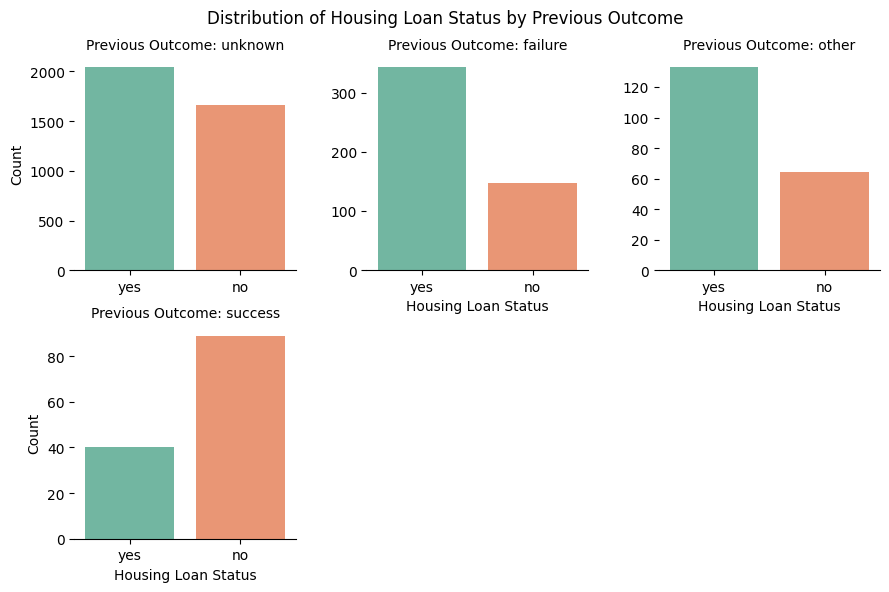

In [39]:
g = sns.FacetGrid(data_df, col="poutcome", col_wrap=3, sharex=False, sharey=False, height=3)
g.map(sns.countplot, "housing", order=data_df["housing"].value_counts().index, palette="Set2")
g.set_axis_labels("Housing Loan Status", "Count")
g.set_titles(col_template="Previous Outcome: {col_name}")
g.despine(left=True)
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Distribution of Housing Loan Status by Previous Outcome")
plt.show()

References:

https://www.kaggle.com/code/aleksandradeis/bank-marketing-analysis

https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

Müller, A.C. and Guido, S. (2018) Introduction to machine learning with python: A guide for data scientists. Sebastopol: O’Reilly Media.

McKinney, W. (2022) Python for Data Analysis: Data wrangling with pandas, NumPy, and Jupyter. Beijing: O’Reilly.

CCT College Dublin: Available at: https://moodle.cct.ie